In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Preparing model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [5]:
y = campaign["y"].map({"yes": 1, "no": 0})

# Encode our features and target as needed
features = ["age", "job", "marital", "education", "campaign", "previous", "poutcome"]

numeric_features = ["age", "campaign", "previous"]

categorical_features = ["job", "marital", "education", "poutcome"]

X = pd.get_dummies(campaign[categorical_features], drop_first=True)

X[numeric_features]= campaign[numeric_features]
y = campaign['y']

# Split our data into training and test data, with 20% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Build the decision tree
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, y_train)

# Test it
clf.score(X_test, y_test)

# Note that this gives us an accuracy score, which may not be the best metric.
# See the SciKit-Learn docs for more ways to assess a model's performance, as
# well as methods for cross validation.

0.8624224440248179

In [5]:
# Let's visualize the tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()

KeyboardInterrupt: 

Do previous calls impact positive responses?

In [6]:
campaign["yes_percent"] = campaign["y"].map({"yes": 1, "no": 0})


In [7]:
bins = [0, 1, 2, 5, 10, 25, float("inf")]
labels = ["1", "2", "3–5", "6–10", "11–25", "25+"]

campaign["campaign_bin"] = pd.cut(campaign["campaign"], bins=bins, labels=labels)


In [8]:
rate_bin = (campaign.groupby("campaign_bin")["yes_percent"].mean().reset_index())

/tmp/ipython-input-1857671695.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_bin = (campaign.groupby("campaign_bin")["yes_percent"].mean().reset_index())


In [9]:
campaign["campaign_bin"].value_counts()

,count
campaign_bin,
1,15874
2,9554
3–5,8614
6–10,2249
11–25,709
25+,69


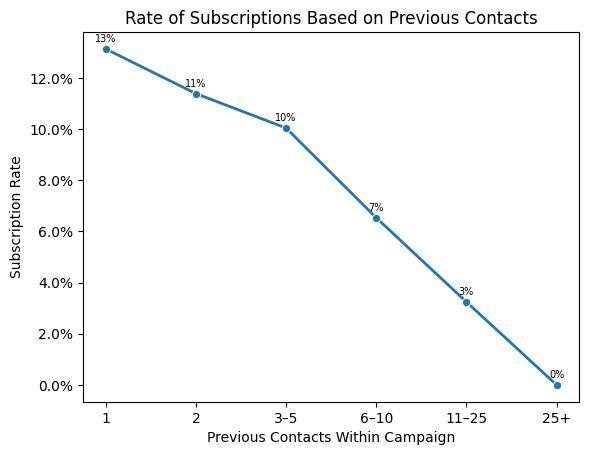

In [21]:
ax =sns.lineplot (data= rate_bin, x = "campaign_bin", y = "yes_percent", marker = "o", linewidth = 2)
plt.title("Rate of Subscriptions Based on Previous Contacts")
plt.ylabel("Subscription Rate")
plt.xlabel("Previous Contacts Within Campaign")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

x_positions = range(len(rate_bin["campaign_bin"]))

for x_pos, y in zip(x_positions, rate_bin["yes_percent"]):
    ax.text(x_pos, y+0.002, f"{y:.0%}", ha="center", va="bottom",fontsize=7)


